## 5. K-Means

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataset=pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [20]:
# X=dataset.values
# X=dataset.iloc[:,:].values
# 공식 홈페이지 권장 
X=dataset.to_numpy()
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체데이터 분포 확인)

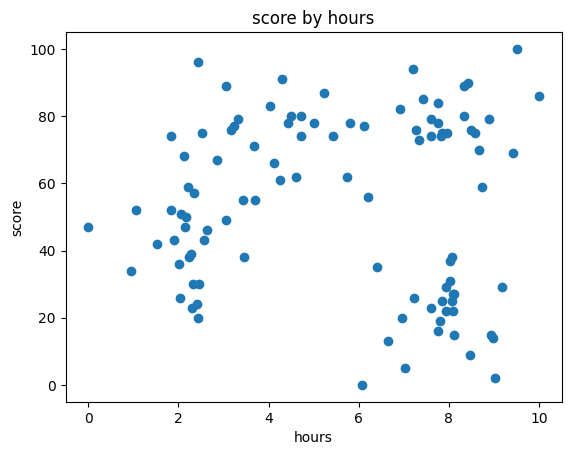

In [21]:
plt.scatter(X[:,0],X[:,-1]) #x 축 공부 시간 y축 점수
plt.title("score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

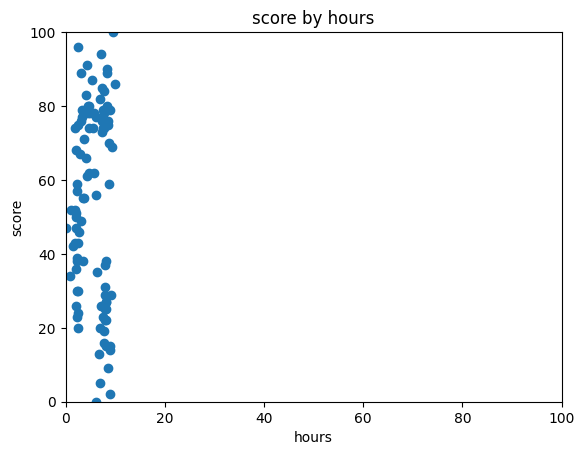

In [22]:
plt.scatter(X[:,0],X[:,-1]) #x 축 공부 시간 y축 점수
plt.title("score by hours")
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylim(0,100)

plt.ylabel('score')
plt.show()

### 피쳐 스케일링(Feature Scaling)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# X데이터에 관하여 자동으로 스케일링
X=sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화(스케일링된 데이터)

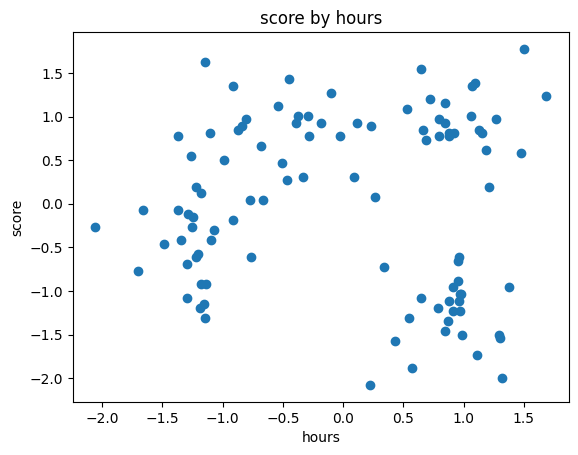

In [24]:
plt.scatter(X[:,0],X[:,-1]) #x 축 공부 시간 y축 점수
plt.title("score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기(엘보우 방식)

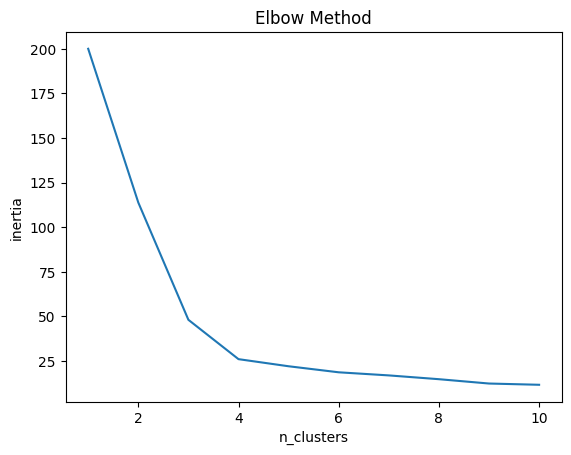

In [25]:
from sklearn.cluster import KMeans
inertia_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) #각 지점으로 부텀 클러스터의 중심(centriod)까지의 가리의 제곱의 합
plt.plot(range(1,11),inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()



### 최적의 K(4)값으로 KMeans 학습

In [28]:
K=4 #최적의 K값
kmeans=KMeans(n_clusters=K,n_init=10,random_state=0)
# kmeans.fit(X)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

### 데이터 시각화(최적의 K)

In [30]:
centers=kmeans.cluster_centers_ #클러스터의 중심점 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

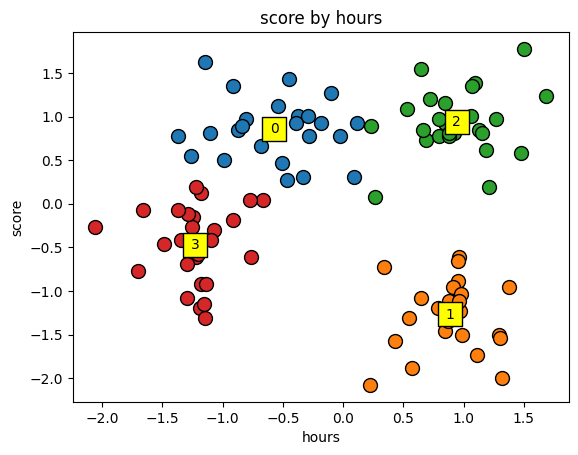

In [33]:
for cluster in range(K):
    plt.scatter(X[y_kmeans==cluster,0],X[y_kmeans==cluster,1],s=100,edgecolor='black')#클러스터
    plt.scatter(centers[cluster,0],centers[cluster,1],s=300,edgecolor='black',color='yellow',marker='s')#클러스터 중심점
    plt.text(centers[cluster,0],centers[cluster,1],cluster,va='center',ha='center') #클러스터 텍스트 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


### 데이터 시각화 스케일링 원복

In [35]:
X_org=sc.inverse_transform(X) #Fiture Scaling 데이터를 다시 원복
X

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.64615029, -1.07514723],
       [ 0.98282328, -1.49888853],
       [ 0.09251026,  0.31164246],
       [ 1.21101275,  0.19607665],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-1.07088197, -0.30470851],
       [ 0.57133407, -1.88410788],
       [-0.76413547, -0.612884  ],
       [-0.9100271 , -0.18914271],
       [-0.50976032,  0.4657302 ],
       [ 1.37560843, -0.95958142],
       [ 0.79204192,  0.77390569],
       [-1.70307903, -0.76697174],
       [-0.68183762,  0.65833988],
       [ 1.11375166, -1.73002014],
       [-0.98484332,  0.50425214],
       [-1.34396117, -0.42027432],
       [ 0.21969783, -2.07671756],
       [ 1.09504761,  1.39025667],
       [ 0.23466107,  0.8894715 ],
       [-2.05471527, -0.26618658],
       [-1.24670009, -0.15062077],
       [-1.2167736 ,

In [36]:
centers_org=sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

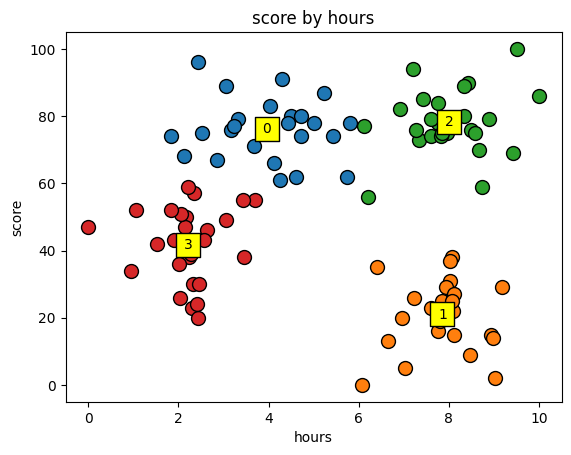

In [37]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans==cluster,0],X_org[y_kmeans==cluster,1],s=100,edgecolor='black')#클러스터
    plt.scatter(centers_org[cluster,0],centers_org[cluster,1],s=300,edgecolor='black',color='yellow',marker='s')#클러스터 중심점
    plt.text(centers_org[cluster,0],centers_org[cluster,1],cluster,va='center',ha='center') #클러스터 텍스트 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()